In [24]:
%matplotlib inline

In [25]:
import os
import sys
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)
    

In [26]:
import pandas as pd
import numpy as np

from util import data_file
import seaborn as sns
sns.set(color_codes=True)

In [27]:
df = pd.read_table(data_file('Inputs','train.csv'),sep=',')

In [28]:
df.columns

Index([u'Insult', u'Date', u'Comment'], dtype='object')

Number of comments is 3947
Longest comment is 17803


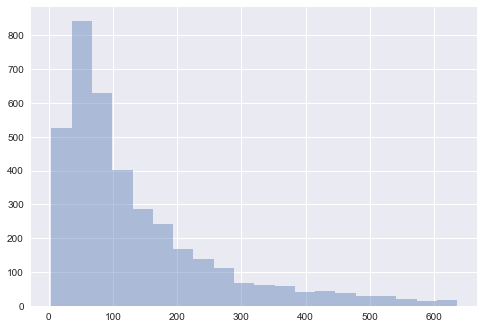

In [64]:
comments = [c[1:-1] for c in df.Comment] # strip offleading and trailing '"' chars)
comment_lengths = [len(c) for c in comments]
print("Number of comments is " + str(len(comment_lengths)))
print("Longest comment is " + str(max(comment_lengths)))

# remove extremes
n = 1 # num standard deviations
comment_lengths = [x for x in comment_lengths if abs(x - np.mean(comment_lengths)) < np.std(comment_lengths) * n]

sns.distplot(comment_lengths, bins=20, kde=False)

This dataset seems to offer a lot of easy wins around the 0-50 character range, but there's also a very long tail with comments ranging up to 17,803 characters in length (!).

Taking only those comments with length within 1 SD the max drops to ~630 characters, around 6-7 sentences long. Seems to demand the building of more complex representations of the document. eg. sentence embeddings, paragraph embeddings

In [30]:
from enchant.checker import SpellChecker

#### How good is the spelling in these comments? 

In [34]:
rate_of_misspellings = []

for c in comments:
    checker = SpellChecker()
    checker.set_text(c)
    num_misspellings = len([e.word for e in checker])
    rate = num_misspellings / float(len(c.split(' ')))
    rate_of_misspellings.append(rate)
    
ave_rate_of_misspelling = sum(rate_of_misspellings) / float(len(comments))
print(ave_rate_of_misspelling)

0.135017394352


Need to check that this isn't being thrown off by some unicode code in the comments, but ~13.5% misspellings is kind of brutal. 

In [67]:
from collections import Counter

# http://www.slate.com/blogs/lexicon_valley/2013/09/11/top_swear_words_most_popular_curse_words_on_facebook.html 
facebook_most_popular_swears = [
    'shit', 'fuck', 'damn', 'bitch', 'crap', 'piss', 'dick', 'darn', 'cock', 'pussy', 'asshole', 'fag', 
    'bastard', 'slut', 'douche'
]

everything = []
for c in comments:
    everything += c.split()

counts = Counter(everything)
swear_counts = [count for count in counts.items() if count[0] in facebook_most_popular_swears]
print(swear_counts)

print("\nTotal common swear words is " + str(sum([elem[1] for elem in swear_counts])))

[('bitch', 54), ('bastard', 8), ('fuck', 155), ('cock', 7), ('douche', 2), ('piss', 10), ('shit', 102), ('asshole', 8), ('darn', 2), ('pussy', 15), ('damn', 18), ('crap', 21), ('dick', 39), ('fag', 2)]

Total common swear words is 443


Ok so there actually aren't a hell of a lot of swear words in this dataset. There's almost 4000 comments in the dataset which gives just over 1 *correctly spelled* and *common* swear word for every 10 comments. 